In [348]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
%matplotlib inline
sns.set_style('white')

In [349]:
df_titanic_train = pd.read_csv('titanic_train.csv')
df_titanic_test = pd.read_csv('titanic_test.csv')
df_titanic_gender = pd.read_csv('titanic_gender_submission.csv')

In [350]:
df_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [351]:
df_titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [352]:
# df_titanic_test.head()

In [353]:
# df_titanic_gender.head()

In [354]:
df_titanic_train = df_titanic_train.drop(['Ticket', 'Cabin','Name'], axis=1)
df_titanic_test = df_titanic_test.drop(['Ticket', 'Cabin','Name'], axis=1)

In [355]:
df_titanic_train = df_titanic_train.dropna()
df_titanic_test = df_titanic_test.dropna()

In [356]:
df_titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


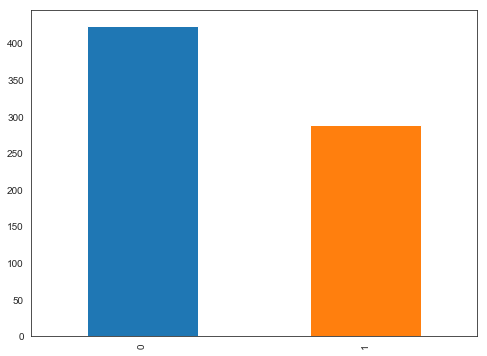

In [357]:
plt.figure(figsize=(8,6))
survived = df_titanic_train.Survived.value_counts()
survived.plot(kind='bar')
plt.show()

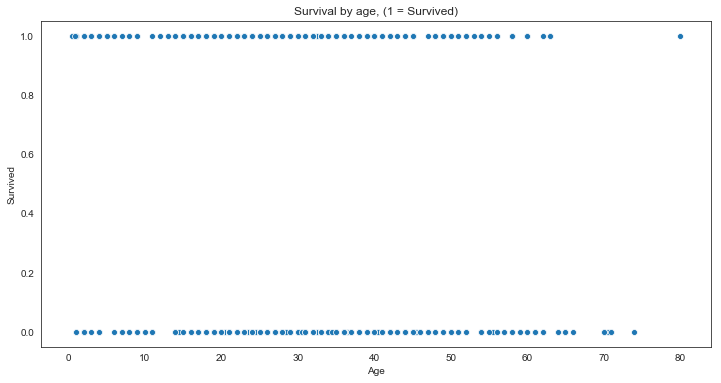

In [358]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Age',y='Survived', data=df_titanic_train)
plt.title("Survival by age, (1 = Survived)")    
plt.show()

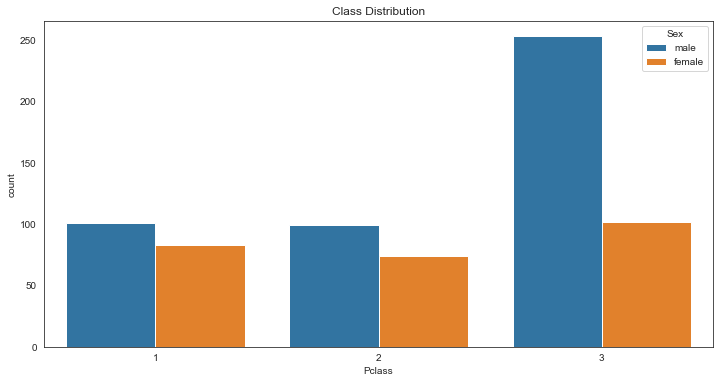

In [359]:
plt.figure(figsize=(12,6))
sns.countplot(x='Pclass', hue='Sex', data=df_titanic_train)
plt.title("Class Distribution")
plt.show()

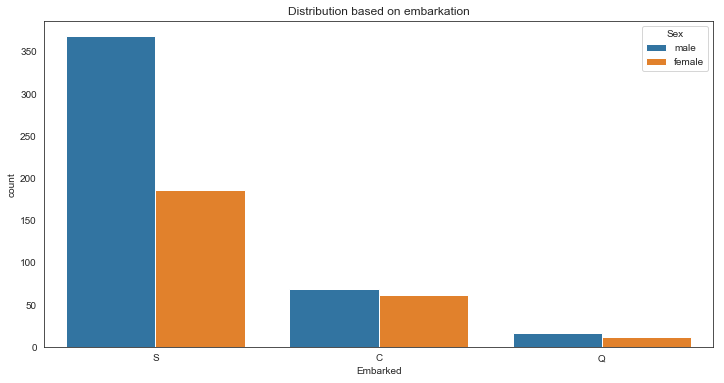

In [360]:
plt.figure(figsize=(12,6))
sns.countplot(x='Embarked', hue='Sex', data=df_titanic_train)
plt.title("Distribution based on embarkation")
plt.show()

In [361]:
df_titanic_train_age = df_titanic_train[['Age','Survived']].dropna()

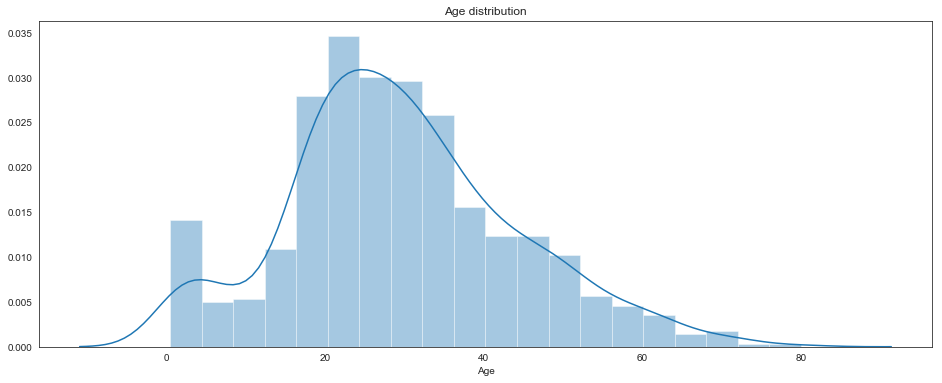

Mean age:  29.64209269662921


In [362]:
plt.figure(figsize=(16,6))
sns.distplot(df_titanic_train_age.Age)
plt.title("Age distribution")    
plt.show()
print('Mean age: ',df_titanic_train_age.Age.mean())

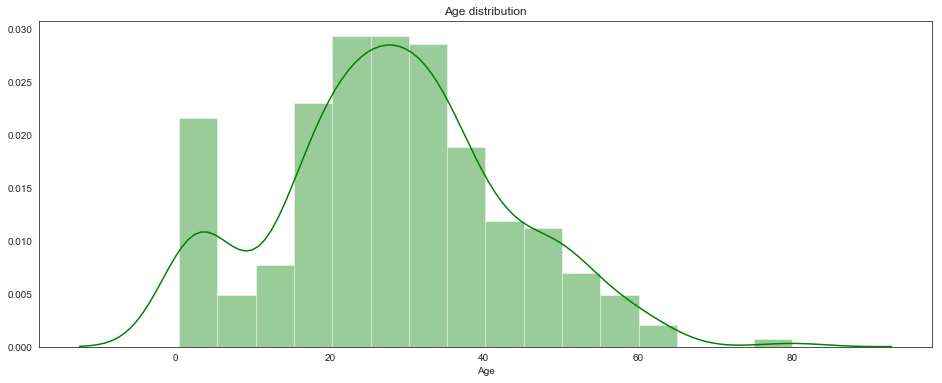

Mean age:  28.19329861111111


In [363]:
plt.figure(figsize=(16,6))
sns.distplot(df_titanic_train_age[df_titanic_train_age['Survived'] == 1].Age, color='green')
plt.title("Age distribution")    
plt.show()
print('Mean age: ',df_titanic_train_age[df_titanic_train_age['Survived'] == 1].Age.mean())

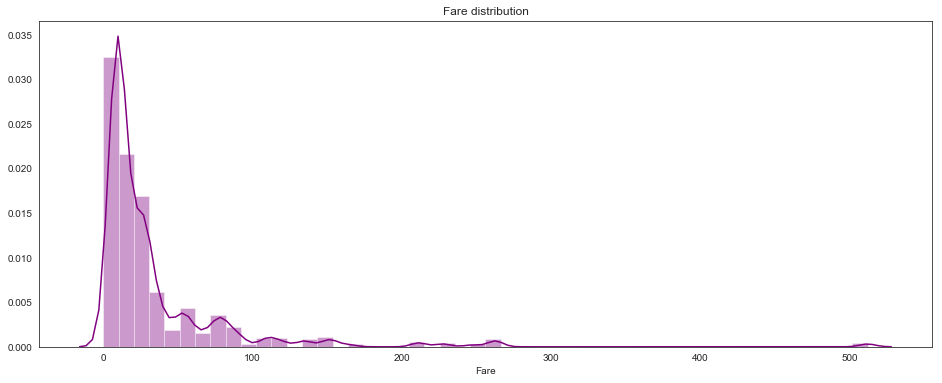

Mean age:  28.19329861111111


In [364]:
plt.figure(figsize=(16,6))
sns.distplot(df_titanic_train.Fare, color='purple')
plt.title("Fare distribution")    
plt.show()
print('Mean age: ',df_titanic_train_age[df_titanic_train_age['Survived'] == 1].Age.mean())

In [365]:
df_titanic_train[df_titanic_train['Fare'] > 250]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
27,28,0,1,male,19.0,3,2,263.0000,S
88,89,1,1,female,23.0,3,2,263.0000,S
258,259,1,1,female,35.0,0,0,512.3292,C
311,312,1,1,female,18.0,2,2,262.3750,C
341,342,1,1,female,24.0,3,2,263.0000,S
438,439,0,1,male,64.0,1,4,263.0000,S
679,680,1,1,male,36.0,0,1,512.3292,C
737,738,1,1,male,35.0,0,0,512.3292,C
742,743,1,1,female,21.0,2,2,262.3750,C


In [366]:
Pct_survived = df_titanic_train.Survived.value_counts()[0] / df_titanic_train.shape[0]
print('% of people survived: ', Pct_survived)

% of people survived:  0.5955056179775281


In [367]:
pd.cut(df_titanic_train['Age'], 6).head()

0    (13.683, 26.947]
1     (26.947, 40.21]
2    (13.683, 26.947]
3     (26.947, 40.21]
4     (26.947, 40.21]
Name: Age, dtype: category
Categories (6, interval[float64]): [(0.34, 13.683] < (13.683, 26.947] < (26.947, 40.21] < (40.21, 53.473] < (53.473, 66.737] < (66.737, 80.0]]

In [312]:
# create an age group feature (REMOVED in favor of a binary, less than <10)
# df_titanic_train['Age_range'] = pd.cut(df_titanic_train['Age'], 6)
# df_titanic_test['Age_range'] = pd.cut(df_titanic_test['Age'], 8)

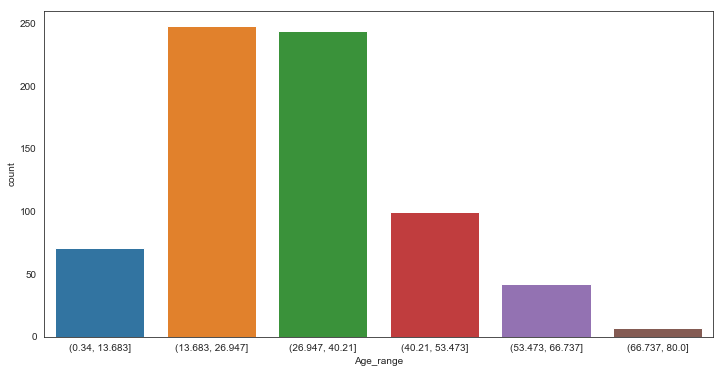

In [313]:
plt.figure(figsize=(12,6))
sns.countplot(x='Age_range', data=df_titanic_train)
plt.show()

In [314]:
df_titanic_train[['Age_range', 'Sex','Survived']].groupby(['Age_range','Sex']).mean()

Survived
Age_range        Sex             
(0.34, 13.683]   female  0.617647
                 male    0.567568
(13.683, 26.947] female  0.741935
                 male    0.122581
(26.947, 40.21]  female  0.811765
                 male    0.220126
(40.21, 53.473]  female  0.714286
                 male    0.215385
(53.473, 66.737] female  0.916667
                 male    0.100000
(66.737, 80.0]   female       NaN
                 male    0.142857

In [ ]:
# use a decision tree 

In [ ]:
# create a fare bucket (REMOVED in favor of scaling fare and a binary less than 25)
# df_titanic_train['Fare_range'] = pd.cut(df_titanic_train['Fare'], 20)
# df_titanic_test['Fare_range'] = pd.cut(df_titanic_test['Fare'], 20)

In [335]:
pd.cut(df_titanic_train['Fare'], 20).head()

0    (-0.512, 25.616]
1    (51.233, 76.849]
2    (-0.512, 25.616]
3    (51.233, 76.849]
4    (-0.512, 25.616]
Name: Fare, dtype: category
Categories (20, interval[float64]): [(-0.512, 25.616] < (25.616, 51.233] < (51.233, 76.849] < (76.849, 102.466] ... (409.863, 435.48] < (435.48, 461.096] < (461.096, 486.713] < (486.713, 512.329]]

In [337]:
# plt.figure(figsize=(12,6))
# sns.countplot(x='Fare_range', data=df_titanic_train)
# plt.show()

In [368]:
df_titanic_train['Age_less_10'] = np.where(df_titanic_train['Age'] <= 10,1,0)

In [369]:
df_titanic_train['Fare_less_25'] = np.where(df_titanic_train['Fare'] <= 25,1,0)

In [370]:
# create a total party feature
df_titanic_train['Party_size'] = df_titanic_train.SibSp + df_titanic_train.Parch + 1
df_titanic_test['Party_size'] = df_titanic_test.SibSp + df_titanic_test.Parch + 1

In [371]:
df_titanic_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_less_10,Fare_less_25,Party_size
0,1,0,3,male,22.0,1,0,7.2500,S,0,1,2
1,2,1,1,female,38.0,1,0,71.2833,C,0,0,2
2,3,1,3,female,26.0,0,0,7.9250,S,0,1,1
3,4,1,1,female,35.0,1,0,53.1000,S,0,0,2
4,5,0,3,male,35.0,0,0,8.0500,S,0,1,1


Additional features could be title from the name (i.e. Miss, Sir, Captain, etc.); instead of removing cabin and ticket, identify if they have a cabin or ticket as a category.

In [372]:
# need to standardize data for regularized regression
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_titanic_train['s_Age'] = scaler.fit_transform(df_titanic_train[['Age']])

In [373]:
scaler2 = MinMaxScaler()
df_titanic_train['s_Fare'] = scaler2.fit_transform(df_titanic_train[['Fare']])

In [374]:
df_titanic_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_less_10,Fare_less_25,Party_size,s_Age,s_Fare
0,1,0,3,male,22.0,1,0,7.2500,S,0,1,2,0.271174,0.014151
1,2,1,1,female,38.0,1,0,71.2833,C,0,0,2,0.472229,0.139136
2,3,1,3,female,26.0,0,0,7.9250,S,0,1,1,0.321438,0.015469
3,4,1,1,female,35.0,1,0,53.1000,S,0,0,2,0.434531,0.103644
4,5,0,3,male,35.0,0,0,8.0500,S,0,1,1,0.434531,0.015713


### Logistic regression model

In [380]:
y = df_titanic_train['Survived']
X = df_titanic_train.drop(['Survived', 'PassengerId', 'Age','Fare'], 1)
X = pd.get_dummies(X)

In [382]:
X.head()

,Pclass,SibSp,Parch,Age_less_10,Fare_less_25,Party_size,s_Age,s_Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,0,1,2,0.271174,0.014151,0,1,0,0,1
1,1,1,0,0,0,2,0.472229,0.139136,1,0,1,0,0
2,3,0,0,0,1,1,0.321438,0.015469,1,0,0,0,1
3,1,1,0,0,0,2,0.434531,0.103644,1,0,0,0,1
4,3,0,0,0,1,1,0.434531,0.015713,0,1,0,0,1


In [388]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1)
fit = lr.fit(X, y)

print('Coefficients: ')
print(fit.coef_)
print('Intercept: ', fit.intercept_)
pred_y = lr.predict(X)

print('\n Accuracy by survival status')
print(pd.crosstab(pred_y, y))

print('\n Percentage accuracy')
print(lr.score(X, y))

Coefficients: 
[[-0.92613459 -0.67683943 -0.39025664  1.42605182 -0.19567037  0.23309635
  -1.40297227  0.67610703  1.95173619 -0.65154376  0.83835884  0.04244361
   0.41938997]]
Intercept:  [1.30019242]

 Accuracy by survival status
Survived    0    1
row_0             
0         369   79
1          55  209

 Percentage accuracy
0.8117977528089888


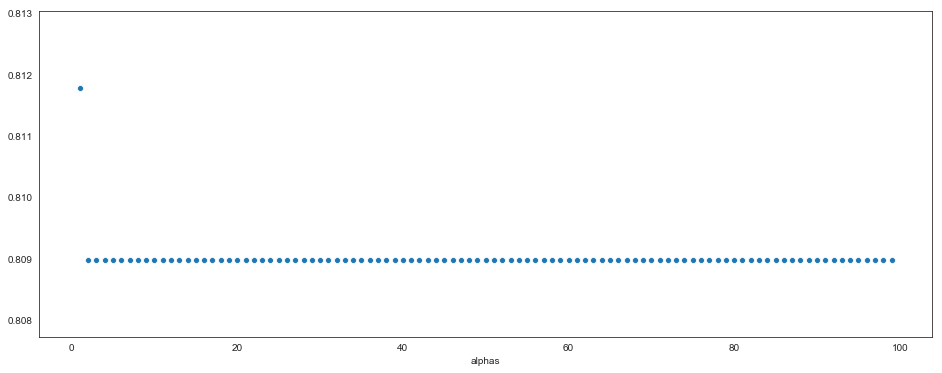

In [387]:
scores = []
rng = range(1,100)

for x in rng:
    lr = LogisticRegression(C= x)
    fit = lr.fit(X, y)
    scores.append(lr.score(X, y))

plt.figure(figsize=(16,6))
sns.scatterplot(x=rng, y=scores)
plt.xlabel('alphas')
plt.show()

In [389]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr, X, y, cv=5)

array([0.75524476, 0.81818182, 0.76923077, 0.76760563, 0.82269504])

### Ridge regression model

In [390]:
from sklearn.linear_model import RidgeClassifier
Ridger = RidgeClassifier(alpha=0.1)

# Fit the model.
fit = Ridger.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_ridge = Ridger.predict(X)

print('\n Accuracy by survival status')
print(pd.crosstab(pred_y_ridge, y))

print('\n Percentage accuracy')
print(Ridger.score(X, y))

Coefficients
[[-0.33794315 -0.07594848  0.00682317  0.48164997 -0.04470951 -0.06912532
  -0.66727819  0.33494505  0.49296746 -0.49296746  0.11454267 -0.100126
  -0.01441667]]
[1.07094597]

 Accuracy by survival status
Survived    0    1
row_0             
0         371   83
1          53  205

 Percentage accuracy
0.8089887640449438


In [391]:
cross_val_score(Ridger, X, y, cv=5)

array([0.75524476, 0.83916084, 0.76223776, 0.75352113, 0.82978723])

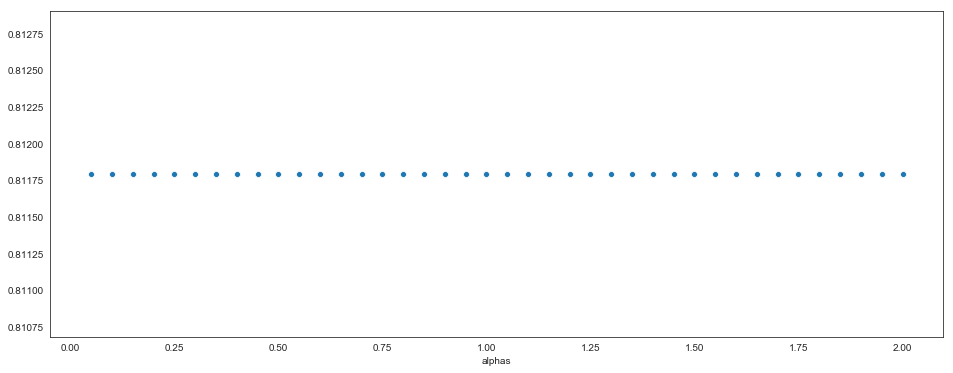

In [412]:
alphas = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0,1.05,1.1,1.15,1.2,1.25,1.3,1.35,1.4,1.45,1.5,1.55,1.6,1.65,1.7,1.75,1.8,1.85,1.9,1.95,2.0]

scores = []
for x in alphas:
    Ridger = RidgeClassifier(alpha=x)
    fit = Ridger.fit(X, y)
    scores.append(lr.score(X, y))

plt.figure(figsize=(16,6))
sns.scatterplot(x=alphas, y=scores)
plt.xlabel('alphas')
plt.show()

### Lasso regression model

In [413]:
from sklearn.linear_model import Lasso
lassor = LogisticRegression(penalty='l1',C=1)

# Fit the model.
fit = lassor.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_lasso = lassor.predict(X)

print('\n Accuracy by survival status')
print(pd.crosstab(pred_y_lasso, y))

print('\n Percentage accuracy')
print(lassor.score(X, y))

Coefficients
[[-1.04173341 -0.43417368 -0.12854912  1.41478196 -0.10805925  0.
  -1.63568591  0.10226708  2.62925548  0.          0.52603205  0.
   0.09212286]]
[1.49495337]

 Accuracy by survival status
Survived    0    1
row_0             
0         368   77
1          56  211

 Percentage accuracy
0.8132022471910112


In [414]:
cross_val_score(lassor, X, y, cv=5)

array([0.75524476, 0.83216783, 0.76923077, 0.76760563, 0.83687943])

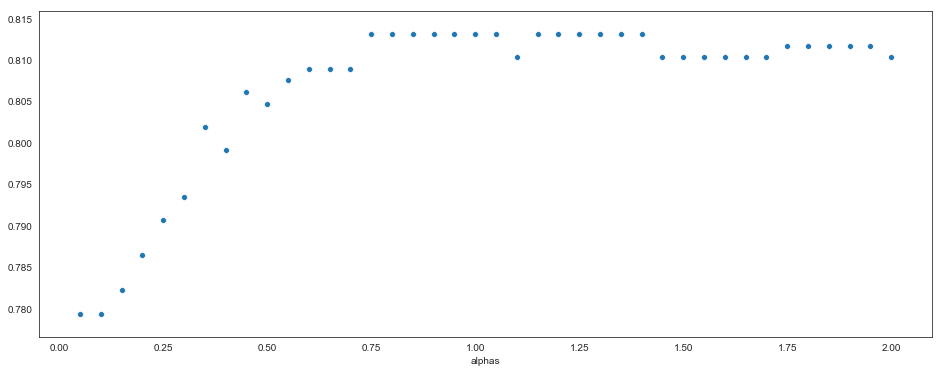

In [415]:
scores = []
for x in alphas:
    lassor = LogisticRegression(penalty='l1', C=x)
    fit = lassor.fit(X, y)
    scores.append(lassor.score(X, y))

plt.figure(figsize=(16,6))
sns.scatterplot(x=alphas, y=scores)
plt.xlabel('alphas')
plt.show()